# Chapter 2 - Training Machine Learning Algorithms for Classification

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./USvideos.csv')

In [3]:
print(df.head())

      video_id trending_date  \
0  1ZAPwfrtAFY      17.13.11   
1  5qpjK5DgCt4      17.13.11   
2  puqaWrEC7tY      17.13.11   
3  d380meD0W0M      17.13.11   
4  nc99ccSXST0      17.13.11   

                                               title          channel_title  \
0  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
1  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
2                   Nickleback Lyrics: Real or Fake?  Good Mythical Morning   
3                           I Dare You: GOING BALD!?               nigahiga   
4                5 Ice Cream Gadgets put to the Test     CrazyRussianHacker   

   category_id              publish_time  \
0           24  2017-11-13T07:30:00.000Z   
1           23  2017-11-12T19:05:24.000Z   
2           24  2017-11-13T11:00:04.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           28  2017-11-12T21:50:37.000Z   

                                                tags    views   lik

# Artificial neurons - a brief glimpse into the early history of machine learning

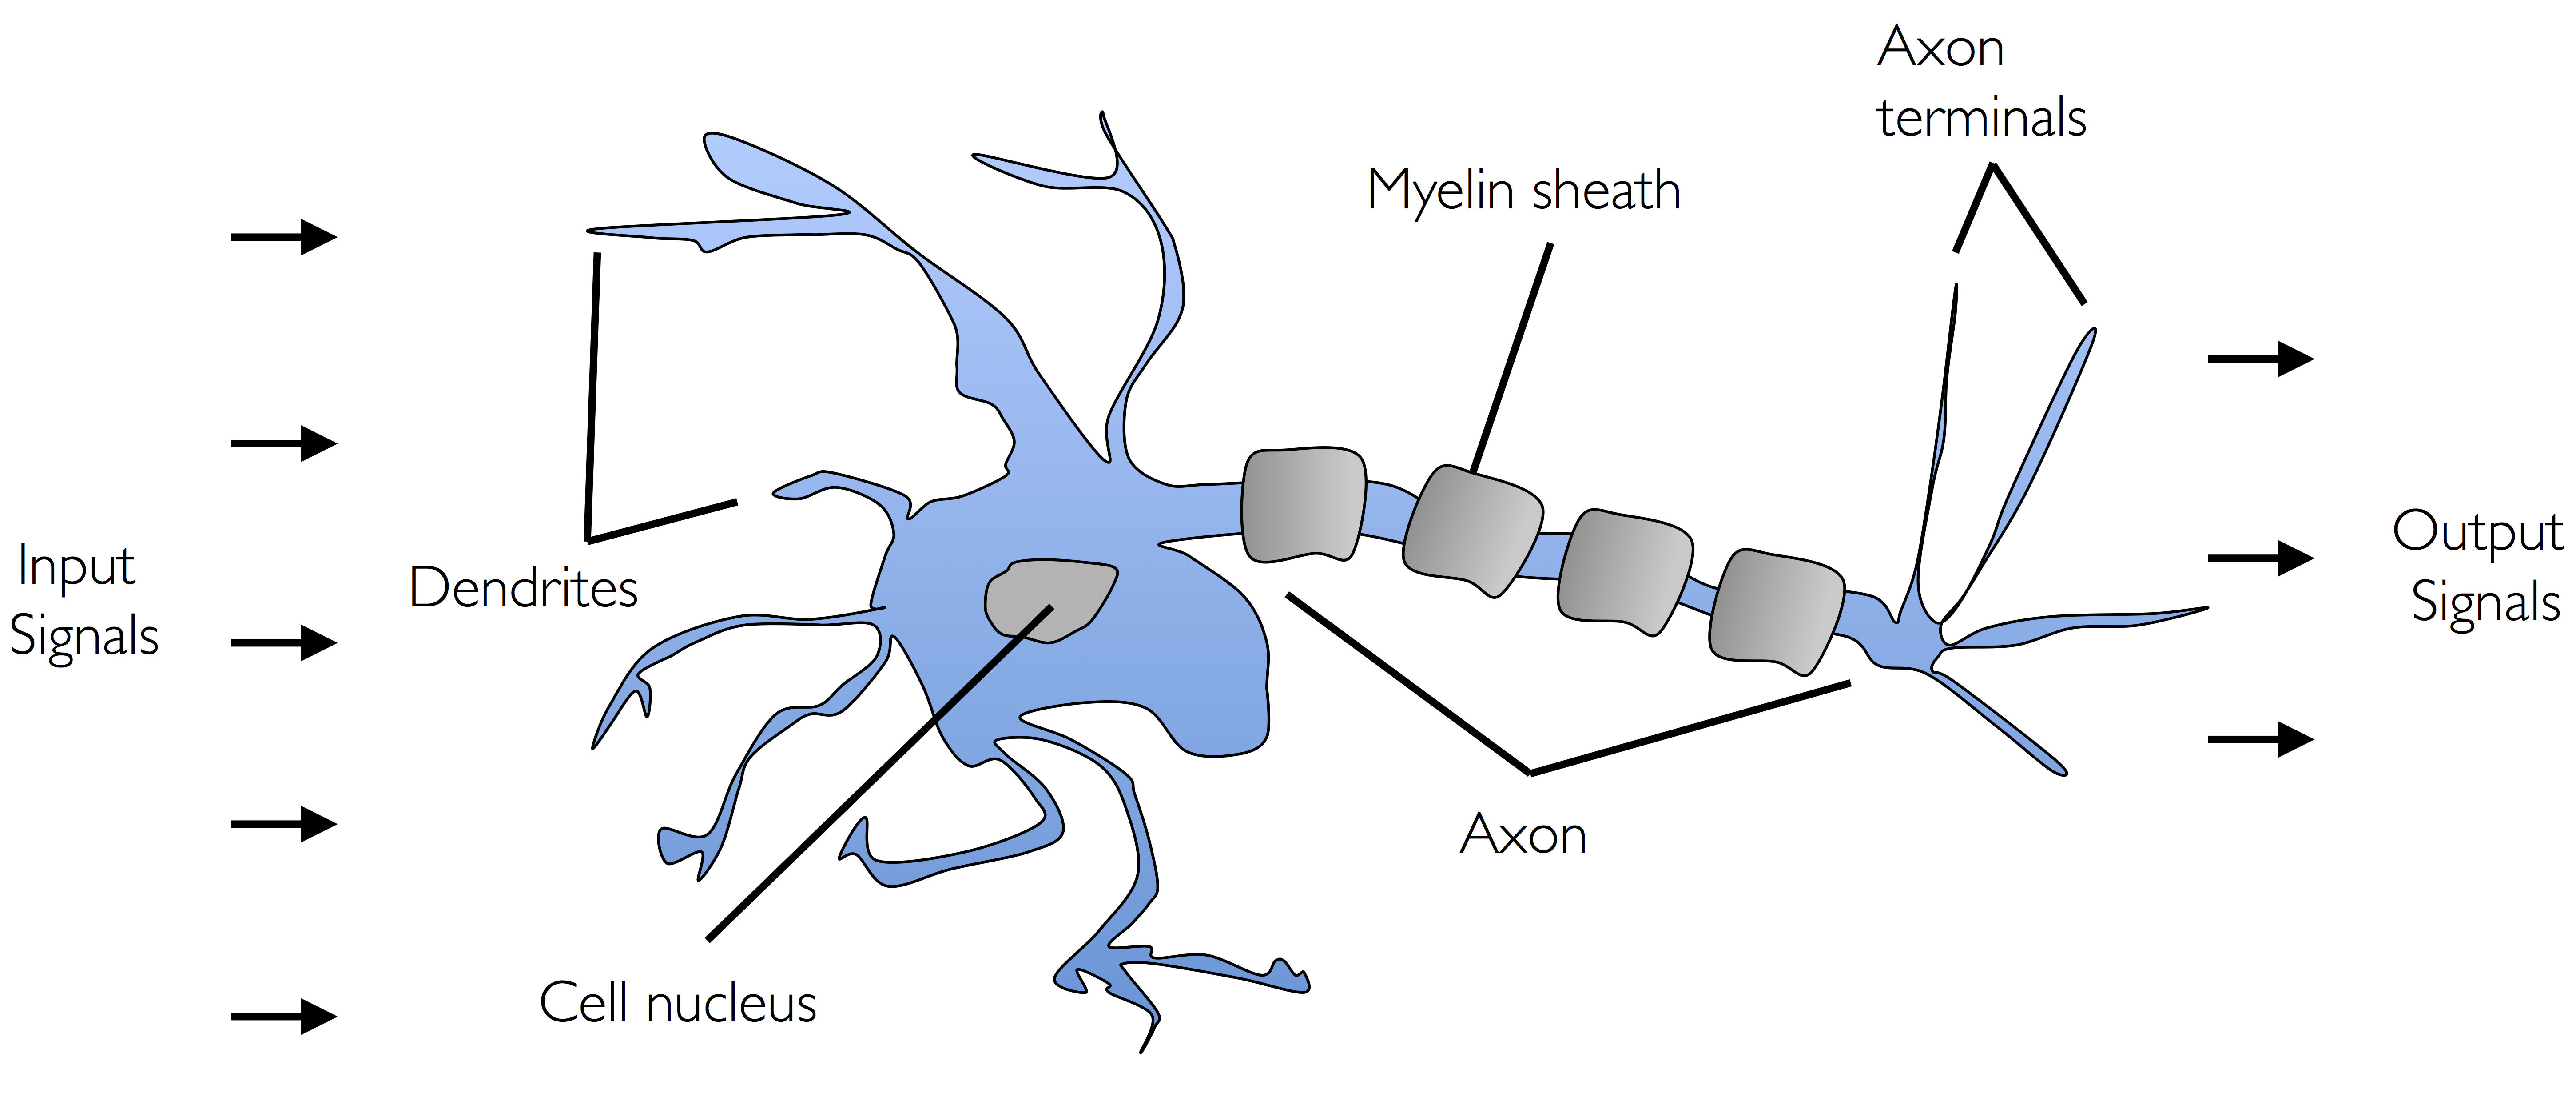

In [3]:
Image(filename='./images/02_01.png', width=500) 

## The formal definition of an artificial neuron

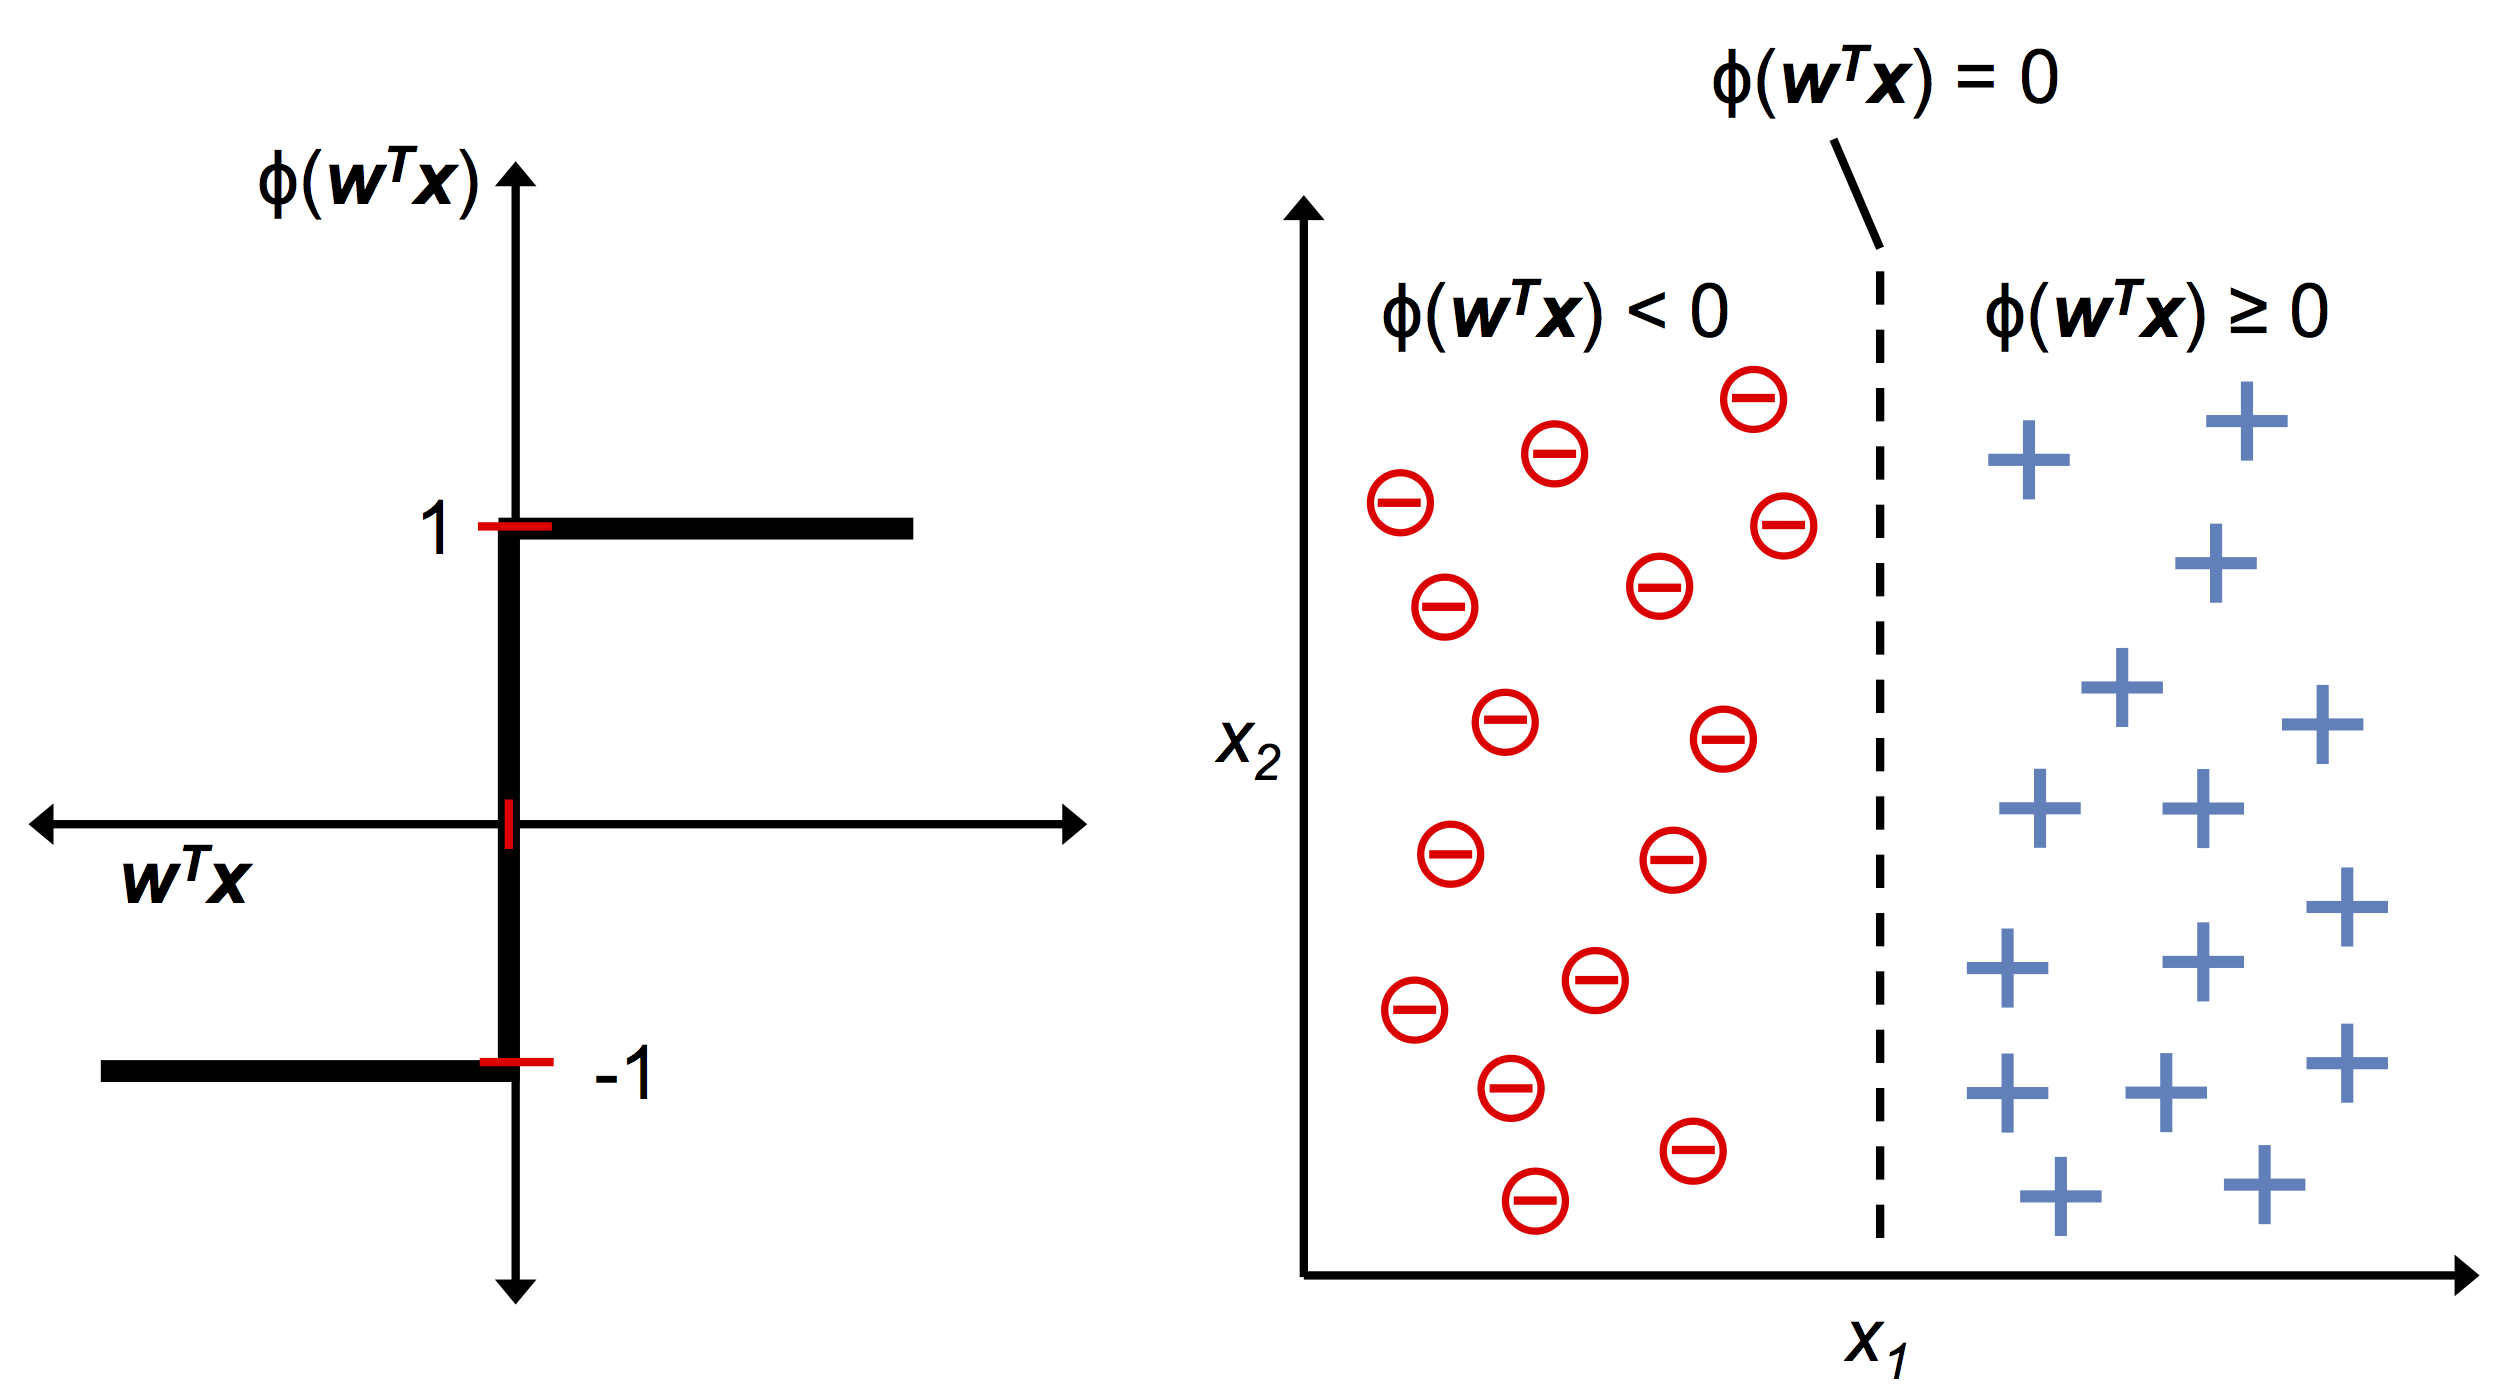

In [4]:
Image(filename='./images/02_02.png', width=500) 

## The perceptron learning rule

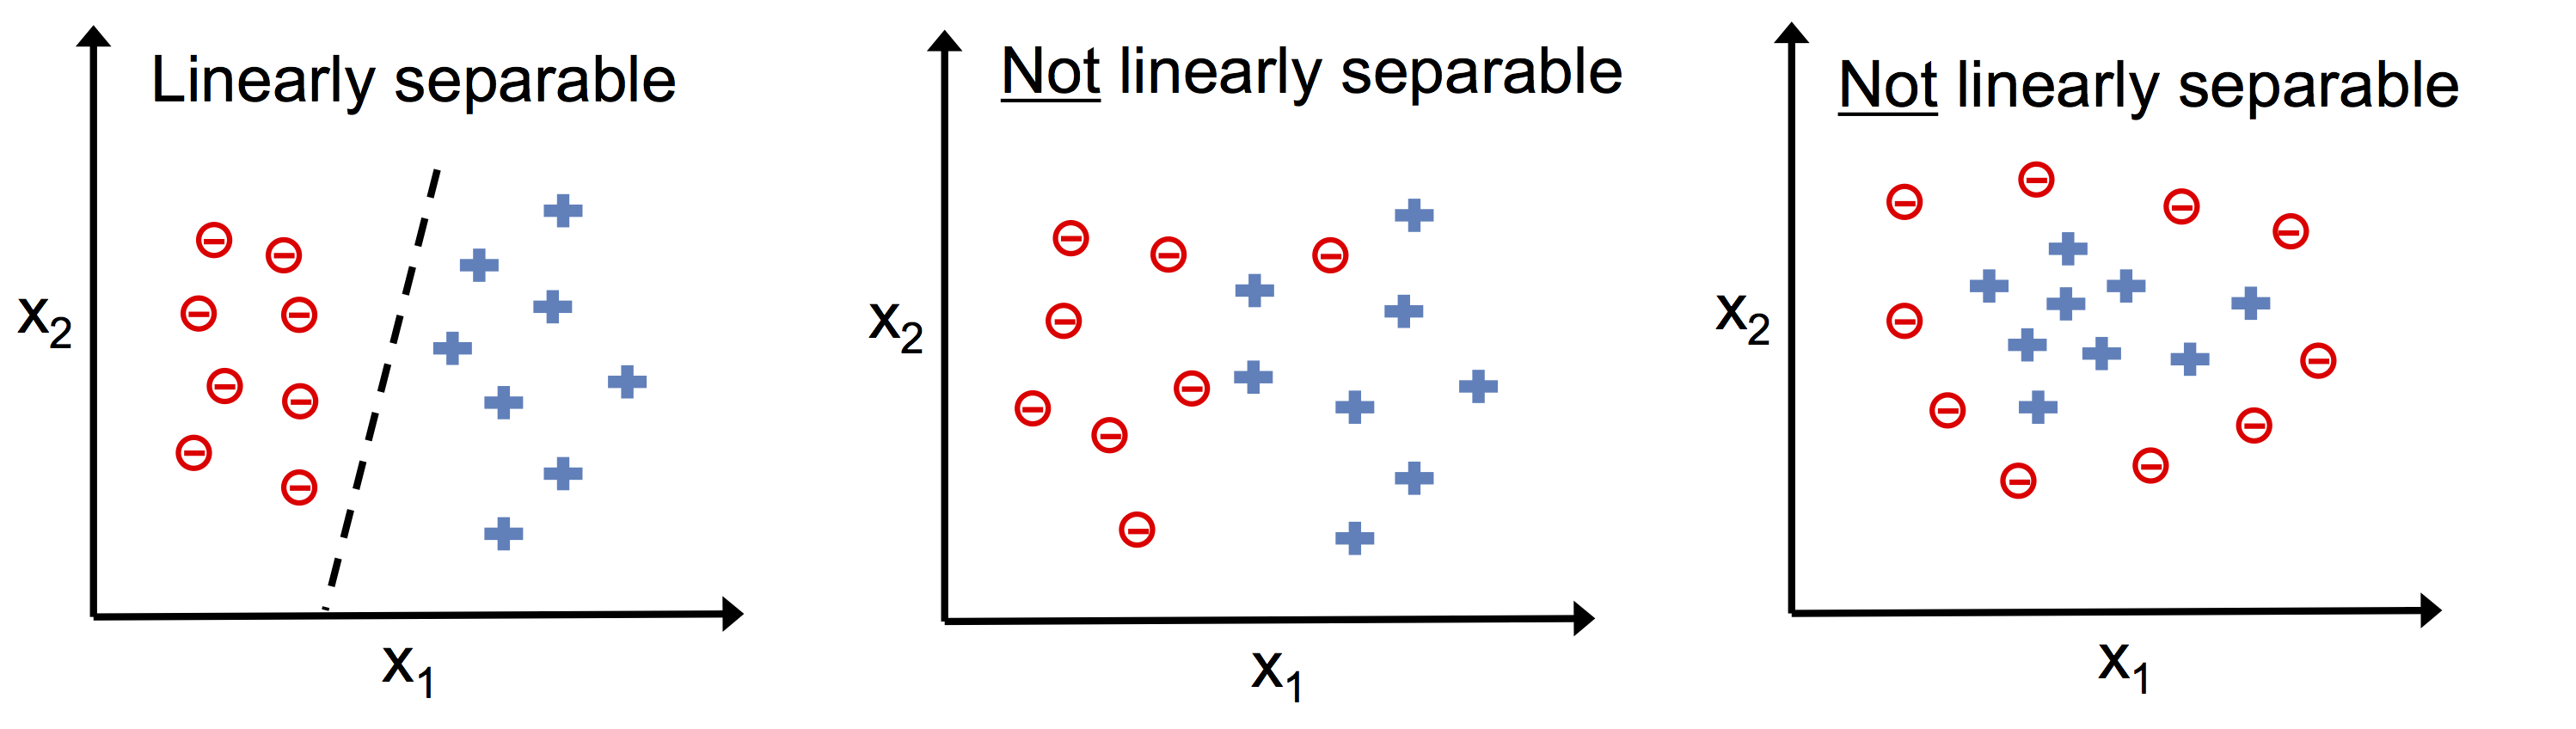

In [5]:
Image(filename='./images/02_03.png', width=600) 

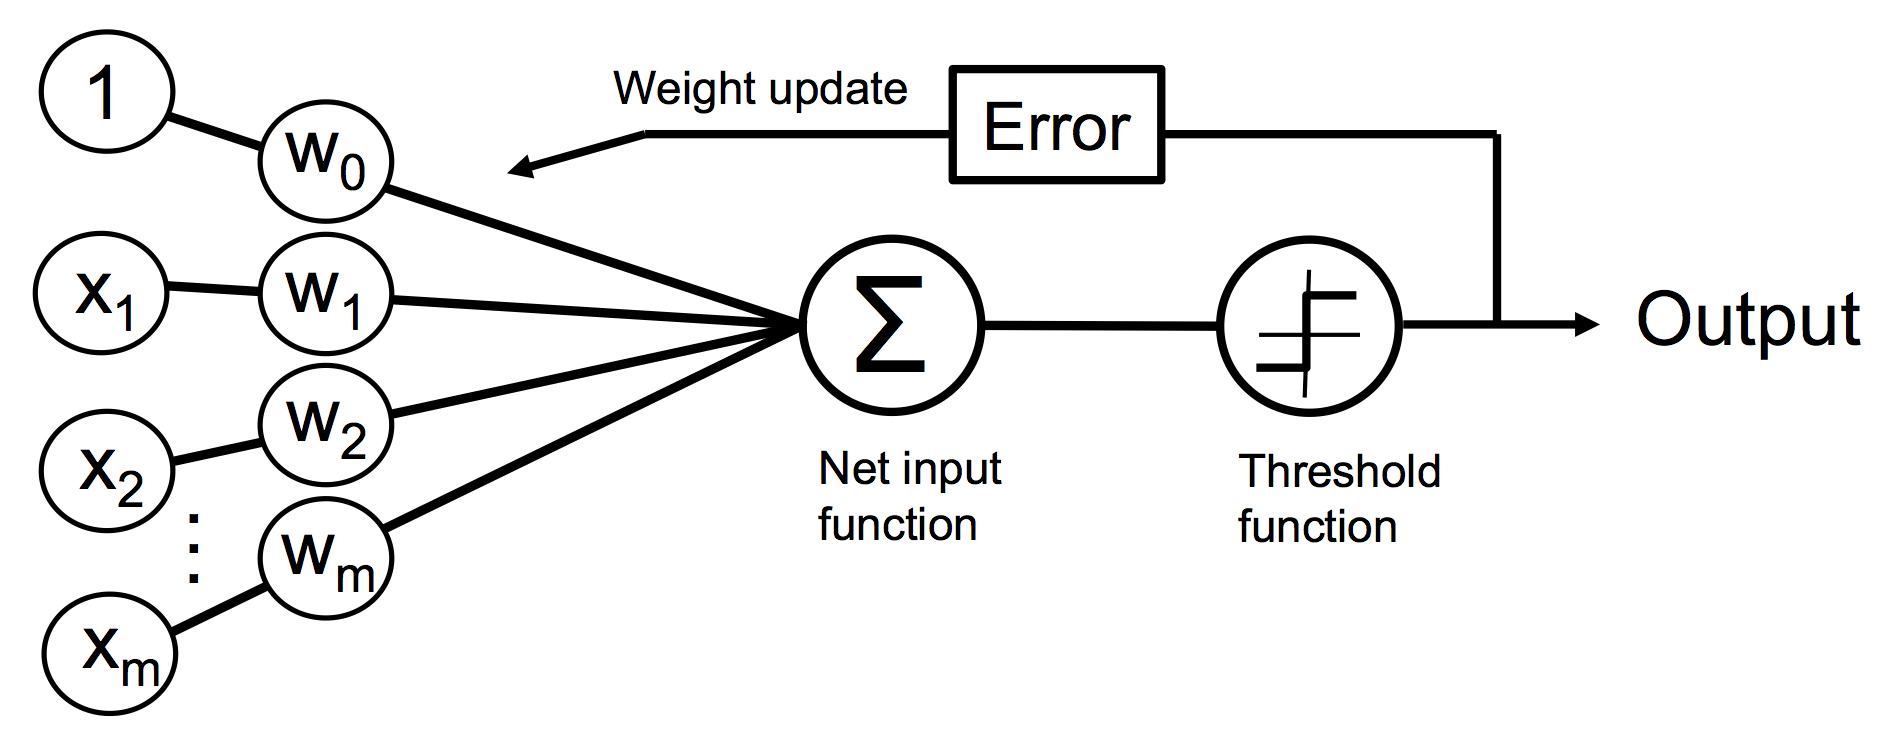

In [6]:
 Image(filename='./images/02_04.png', width=600) 

<br>
<br>

# Implementing a perceptron learning algorithm in Python

## An object-oriented perceptron API

In [2]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, learning_rate=0.01, n_iter=50, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## Training a perceptron model on the Iris dataset

### Reading-in the Iris data

In [5]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

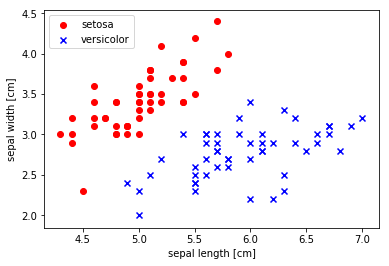

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

<br>
<br>

### Training the perceptron model

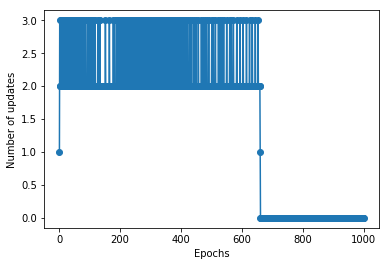

In [37]:
ppn = Perceptron(learning_rate=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### A function for plotting decision regions

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## ------------------------------------- Deliverables -------------------------------------

### Updates vs. epochs (1,000 iterations)

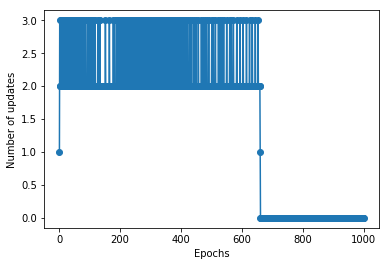

In [40]:
ppn = Perceptron(learning_rate=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### 10 epochs

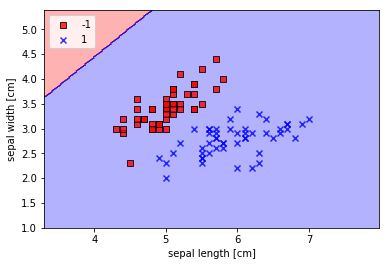

In [25]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### 20 epochs

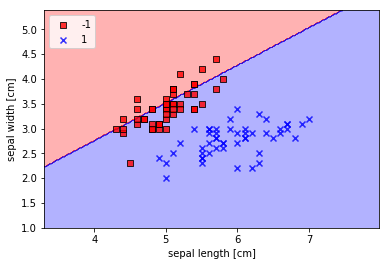

In [27]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### 50 epochs

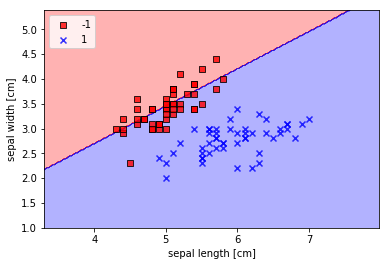

In [30]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### 100 epochs

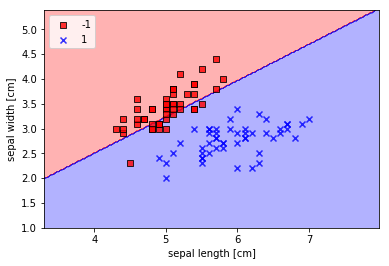

In [32]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### 200 epochs

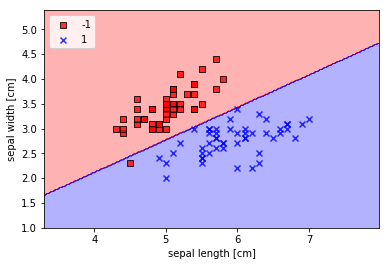

In [34]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### 500 epochs

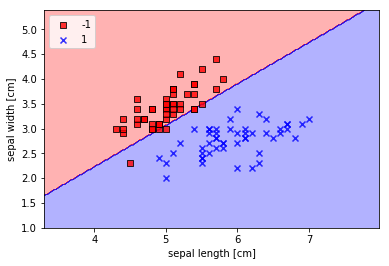

In [36]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### 1,000 epochs

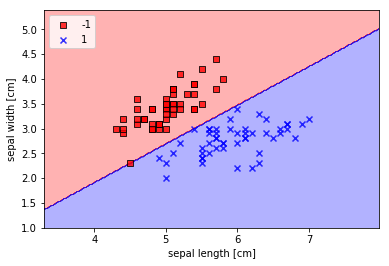

In [38]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [7]:
ppn = Perceptron(learning_rate=0.1, n_iter=1000)

ppn.fit(X, y)

print("Bias:", ppn.w_[0])
print("Weights:", ppn.w_[1:])

Bias: -23.983756546363317
Weights: [ 15.53388244 -19.96528172]


### Learned linear function

$$y = 15.53388x_1 - 19.96528x_2 - 23.98376$$

## ------------------------------------- Extra Credit -------------------------------------

In [142]:
class Winnow():
    def __init__(self, learning_rate=1.0, n_iter=10, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = np.ones(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.learning_rate * (target - self.predict(xi))
                
                # if positive class                
                if target > self.predict(xi):
                    self.w_[1:] *= self.learning_rate * xi
                
                # else if negative class
                elif target < self.predict(xi):
                    self.w_[1:] /= self.learning_rate * xi
                
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 100.0, 1, -1)

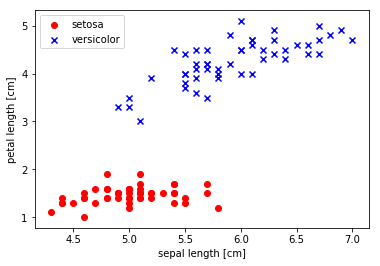

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

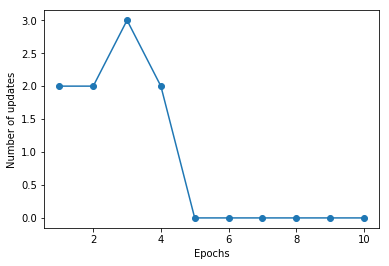

In [144]:
winn = Winnow(learning_rate=1, n_iter=10)

winn.fit(X, y)

plt.plot(range(1, len(winn.errors_) + 1), winn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

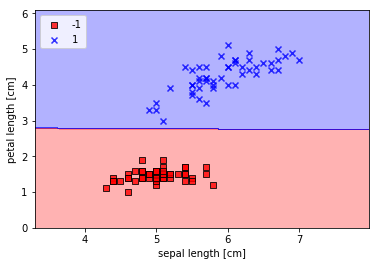

In [145]:
plot_decision_regions(X, y, classifier=winn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [146]:
print("Bias:", winn.w_[0])
print("Weights:", winn.w_[1:])

Bias: 1.0
Weights: [ 0.31213232 35.20483824]


### Learned linear function

$$y = 0.31213x_1 + 35.20484x_2 + 1.0$$